In [1]:
#Load Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score, ConfusionMatrixDisplay, classification_report
    )

In [2]:
#Load Data
url="https://breathecode.herokuapp.com/asset/internal-link?id=809&path=housing.csv"
df_raw = pd.read_csv(url)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [3]:
df_raw.sample(10, random_state=2025)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
8651,4.8971,24.0,4.200704,1.024648,1152.0,2.028169,33.86,-118.39,4.007
3034,4.5903,13.0,6.759358,1.080214,552.0,2.951872,35.39,-119.12,0.943
2918,3.0435,40.0,5.009804,1.019608,771.0,2.519608,35.36,-119.04,0.695
12884,1.9805,16.0,3.977301,1.084489,1837.0,2.316520,38.66,-121.34,0.929
13325,2.3636,39.0,3.993399,1.023102,1294.0,4.270627,34.06,-117.63,0.883
2045,1.4007,7.0,4.466425,1.174229,1587.0,2.880218,36.73,-119.73,2.250
9331,2.7273,25.0,3.601545,1.049669,5917.0,3.265453,37.97,-122.50,1.875
16647,4.2411,27.0,6.436709,1.079114,768.0,2.430380,35.27,-120.65,2.589
8892,2.9934,35.0,3.349425,1.073563,1334.0,1.533333,34.02,-118.50,3.500
18177,8.6155,17.0,7.527273,1.010909,797.0,2.898182,37.36,-122.00,4.112


In [4]:
#Preprocessing
df_baking = df_raw.copy()
df_baking.columns = df_baking.columns.str.lower()
df_baking = df_baking.drop(columns=[
    'houseage','averooms',
    'avebedrms','population',
    'aveoccup','medhouseval'
    ])
df = df_baking.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   medinc     20640 non-null  float64
 1   latitude   20640 non-null  float64
 2   longitude  20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB


In [5]:
# EDA
df_train, df_test = train_test_split(df, test_size=0.1, random_state=2025)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_train.shape, df_test.shape

((18576, 3), (2064, 3))

In [6]:
scaler = MinMaxScaler()
df_train_sc = scaler.fit_transform(df_train)
df_train_sc = pd.DataFrame(df_train_sc, columns= df_train.columns)

df_test_sc = scaler.transform(df_test)
df_test_sc = pd.DataFrame(df_test_sc, columns= df_test.columns)

df_train_sc.shape, df_test_sc.shape

((18576, 3), (2064, 3))

Al ser un algoritmo que trabajamos con distancia, se debe hacer el esacalado de los datos para que estén entre 0 y 1

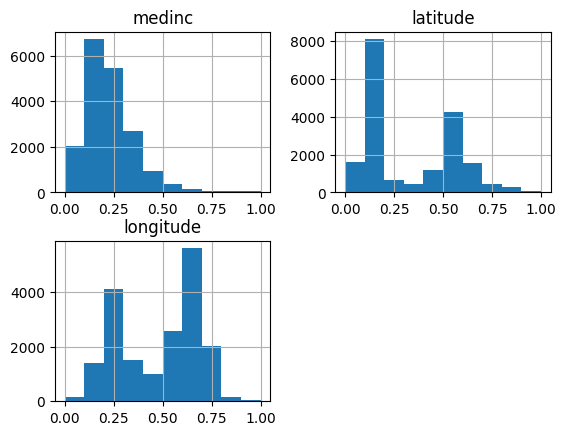

In [7]:
df_train_sc.hist()
plt.show()

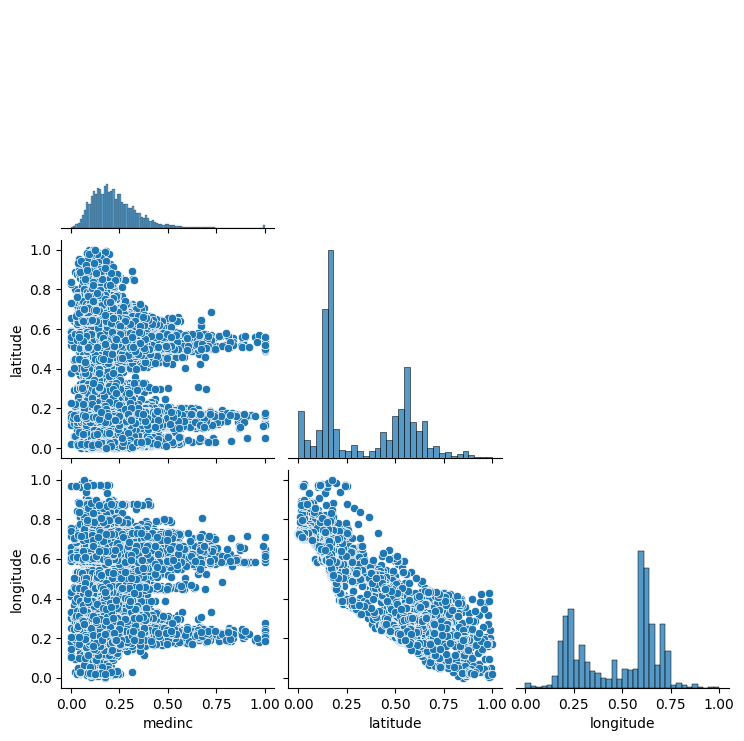

In [8]:
sns.pairplot(df_train_sc, corner=True)
plt.show()

In [9]:
clu_kmeans = KMeans(n_clusters=6, n_init='auto', random_state=2025)

clu_kmeans.fit(df_train_sc)

KMeans(n_clusters=6, random_state=2025)

In [16]:
df_train['cluster'] = clu_kmeans.labels_

y_train = pd.Series(clu_kmeans.labels_, name='cluster').astype("category")
X_train = df_train_sc.copy() # Predictoras escaladas

print(f"Clusters creados en datos de entrenamiento.\nCantidad por cluster:")
print(df_train['cluster'].value_counts().sort_index())

Clusters creados en datos de entrenamiento.
Cantidad por cluster:
cluster
0    7321
1    4487
2    1736
3    2680
4    1541
5     811
Name: count, dtype: int64


In [11]:
y_test = pd.Series(
    clu_kmeans.predict(df_test_sc),
    name='cluster_kmeans_pred'
).astype("category")

X_test = df_test_sc.copy()

df_test['cluster'] = y_test

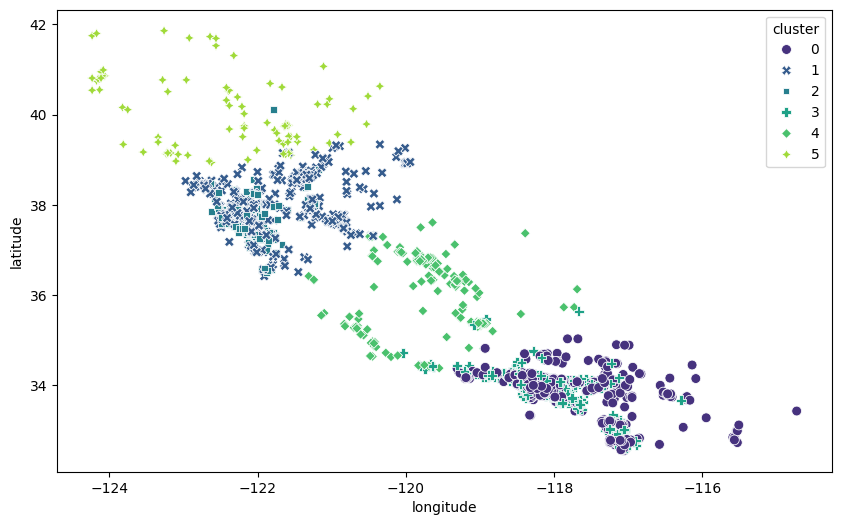

In [12]:
# Gráfica Scatter de los Clusters (Longitud vs Latitud)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_test,
    x='longitude',
    y='latitude',
    hue='cluster',
    palette='viridis',
    style='cluster',
    s=50
)
plt.show()

In [13]:
tree_model = DecisionTreeClassifier(random_state=2025, max_depth=8)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=2025)

In [14]:
y_hat = tree_model.predict(X_test)
print("Reporte de Clasificación del Árbol de Decisión vs. K-Means (Conjunto Test):")
print(f'Accuracy: {accuracy_score(y_test, y_hat):.4f}')
print(classification_report(y_test, y_hat))

Reporte de Clasificación del Árbol de Decisión vs. K-Means (Conjunto Test):
Accuracy: 0.9913
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       808
           1       0.99      0.99      0.99       507
           2       0.98      0.99      0.99       178
           3       0.98      0.99      0.99       310
           4       1.00      0.99      0.99       168
           5       0.96      0.97      0.96        93

    accuracy                           0.99      2064
   macro avg       0.99      0.99      0.99      2064
weighted avg       0.99      0.99      0.99      2064



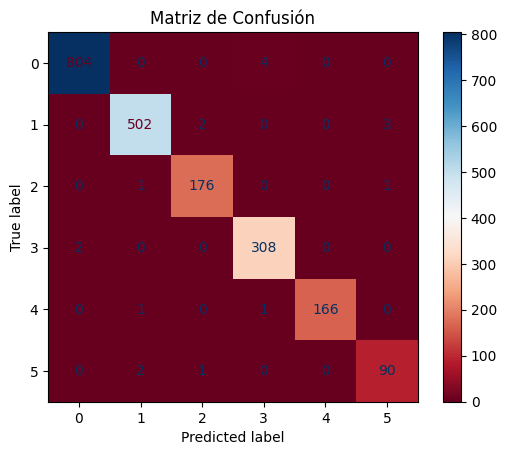

In [15]:
ConfusionMatrixDisplay.from_estimator(tree_model, X_test, y_test, cmap="RdBu")
plt.title('Matriz de Confusión')
plt.show()